#YOLOv8 Tutorial - Train and test using Python code
YOLOv8 is an advanced version of the YOLO (You Only Look Once) series of models, which are widely used for real-time object detection. YOLOv8 improves


**Key features of YOLOv8:**
*   Real-Time Performance: YOLO models are known for their high inference speed, making them ideal for real-time applications.
*   Single Shot Detection: YOLO can detect objects in a single pass, which increases efficiency.
*   Accuracy: YOLOv8 improves on its predecessors, achieving better performance on standard benchmark datasets.

Reference : [ultralytics Yolov8](https://docs.ultralytics.com/models/yolov8/#citations-and-acknowledgements)
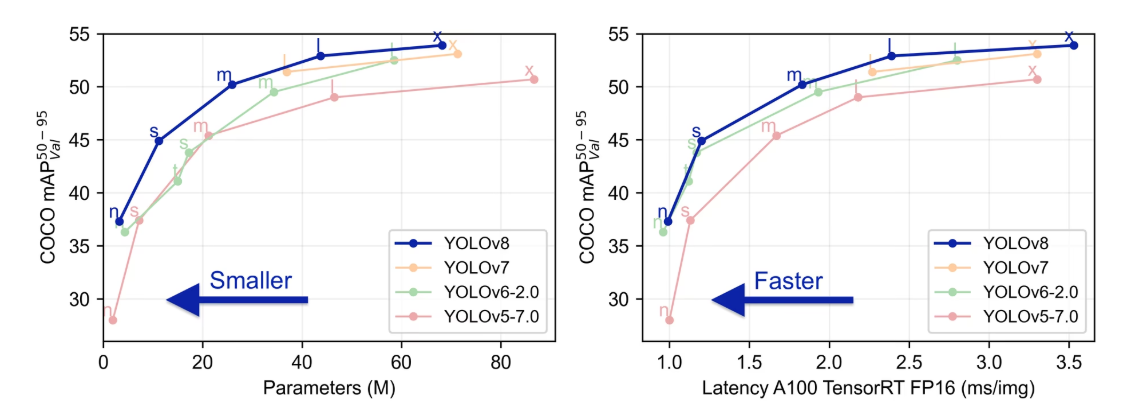


# Steps to Run YOLOv8 in Google Colab
Connect to Google drive to acces our dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Install YOLOv8 Dependencies
First, we'll install the necessary dependencies, such as ultralytics, which includes the YOLOv8 implementation.

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# Step 2: import & Load a Pre-trained YOLOv8 Model
YOLOv8 comes with pre-trained models that can be used directly for inference or fine-tuned for your specific dataset. You can load the pre-trained model like this:

In [2]:
from ultralytics import YOLO

In [3]:
# Load a YOLOv8 model
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 246MB/s] 


In [ ]:
# !pip install roboflow           

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="zVwIE1yVxhpq2eF9mjtx")
# project = rf.workspace("bccdyolodataset").project("road_yolo-epmit")
# version = project.version(1)
# dataset = version.download("yolov8")

You have 5 model sizes:

1.   XL
2.   Large
3.  Medium
4.  Small
5.  Tiny
**You can choose between yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt**


yolov8n.pt is the "nano" version, which is smaller and faster but less accurate.

yolov8x.pt is the "extra-large" version, which has the highest accuracy but requires more computational resources.

# Step 3: Prepare Your Dataset
If you want to train a custom object detection model, you’ll need to have a dataset in the following format:

Images: Stored in a folder (e.g., /images/).

Labels: Text files for each image with bounding box coordinates in the format [class_id, x_center, y_center, width, height], normalized between 0 and 1 (e.g., /labels/).


For training, you'll also need to create a data.yaml file with paths to your train and validation sets, as well as the class labels.


```
train: /path/to/train/images
val: /path/to/val/images

nc: 3  # Number of classes
names: ['class1', 'class2', 'class3']  # Class names

```





# SVRDD Dataset
The SVRDD dataset comprises 8,000 street view images collected from five districts in Beijing City: Dongcheng, Xicheng, Haidian, Chaoyang, and Fengtai. These images encompass a variety of urban road types and pavement conditions. The dataset includes 20,804 annotated instances of pavement damages, making it one of the most comprehensive datasets for road damage detection from street view imagery.

The primary objective of the SVRDD dataset is to facilitate the development and evaluation of deep learning models for automated road damage detection, leveraging street view images as a data source.

Reference: [click here](https://www.nature.com/articles/s41597-024-03263-7#:~:text=Examples%20of%20different%20damage%20categories,%3B%20(f)%20transverse%20patch.)

Damage Categories in SVRDD
The SVRDD dataset annotates seven categories of pavement damages:

1.  Longitudinal Crack: Cracks running parallel to the direction of traffic.
2.   Transverse Crack: Cracks running perpendicular to the direction of traffic.
3.  Alligator Crack: A network of interconnected cracks resembling alligator skin.
4.  Pothole: A deep, bowl-shaped hole in the pavement surface.
5.  Longitudinal Patch: A patch repair running parallel to the direction of traffic.
6.  Transverse Patch: A patch repair running perpendicular to the direction of traffic.
7.  Manhole Cover: The cover of a manhole in the pavement surface.



# YAML File for YOLO
To train a YOLO model using the costom dataset, you need to create a YAML file that defines the dataset's classes. Here's an example of how the YAML file should look:


```
train: /home/work/wonjun/usc/yolov8/ROAD_YOLO-1/train/images
val: /home/work/wonjun/usc/yolov8/ROAD_YOLO-1/val
test: /home/work/wonjun/usc/yolov8/ROAD_YOLO-1/test
nc: 4
names:
  0: 'Pothole'
  1: 'Alligator Crack'
  2: 'Transverse Crack'
  3: 'Longitudinal Crack'
```
In this YAML file:

* train, test, and val: Specify the directories containing your training and validation images, respectively.

* nc: Indicates the number of classes (4 in this case).

* names: Lists the class names corresponding to the class IDs.




# Step 4: Train YOLOv8 Model
To train your custom YOLOv8 model, use the following command. Here we assume you've uploaded your dataset and have a data.yaml file.


In [4]:
# Train the YOLOv8 model on your custom dataset
model = YOLO('yolov8x.pt')  # Load pre-trained model
model.train(data='/home/work/wonjun/usc/yolov8/road_data.yaml', epochs=10, imgsz=320, batch=16, lr0=0.01, lrf=0.01, optimizer='SGD')

Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA H100 80GB HBM3, 8156MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/work/wonjun/usc/yolov8/road_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=

train: Scanning /home/work/wonjun/usc/yolov8/train/labels.cache... 14452 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14452/14452 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 261.6±154.3 MB/s, size: 67.4 KB)


val: Scanning /home/work/wonjun/usc/yolov8/val/labels.cache... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 7 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.78G      2.261      2.634      1.859         10        320: 100%|██████████| 904/904 [02:38<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.51it/s]

                   all        604       1659      0.392      0.315      0.289      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.77G      2.115      2.151      1.674          8        320: 100%|██████████| 904/904 [02:22<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.13it/s]

                   all        604       1659      0.358      0.272      0.203     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.91G      2.217      2.275      1.756         10        320: 100%|██████████| 904/904 [02:17<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  6.99it/s]


                   all        604       1659      0.331      0.286       0.22     0.0766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.91G      2.262      2.335      1.812         10        320: 100%|██████████| 904/904 [02:22<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.97it/s]


                   all        604       1659       0.38      0.272       0.23     0.0864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       3.9G      2.143      2.171      1.732          5        320: 100%|██████████| 904/904 [02:19<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.05it/s]

                   all        604       1659      0.413      0.363      0.304      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.91G      2.057      2.028      1.666         11        320: 100%|██████████| 904/904 [02:18<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]


                   all        604       1659      0.453      0.411      0.394      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.92G       1.98      1.909      1.619         10        320: 100%|██████████| 904/904 [02:20<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.94it/s]


                   all        604       1659      0.491      0.413      0.414      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.91G      1.912      1.801      1.567          9        320: 100%|██████████| 904/904 [02:19<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.10it/s]

                   all        604       1659      0.505      0.451      0.431      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.91G      1.839      1.694      1.517         13        320: 100%|██████████| 904/904 [02:16<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:02<00:00,  7.14it/s]

                   all        604       1659      0.531      0.463      0.458      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.92G       1.78      1.584      1.484         16        320: 100%|██████████| 904/904 [02:16<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]


                   all        604       1659      0.579      0.484      0.506       0.22

10 epochs completed in 0.406 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 136.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA H100 80GB HBM3, 8156MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]


                   all        604       1659       0.58      0.484      0.506       0.22
               Pothole        195        368      0.595      0.408      0.466      0.188
       Alligator Crack        289        354      0.576      0.526      0.549      0.246
      Transverse Crack        290        473       0.57      0.526      0.539      0.218
    Longitudinal Crack        282        464      0.578      0.474       0.47      0.228
Speed: 0.0ms preprocess, 2.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f6ec06f90f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

### **Explanation of Parameters for `model.train()`**

```python
model.train(data='/content/drive/MyDrive/SVRDD/SVRDD_data.yaml', epochs=3, imgsz=320, batch=8, lr0=0.0001, lrf=0, optimizer='SGD')
```

1. **`data='/content/drive/MyDrive/SVRDD/SVRDD_data.yaml'`**: Path to the dataset YAML file, containing the paths to images and class info.
2. **`epochs=3`**: Number of training epochs (iterations over the entire dataset). More epochs = better learning.
3. **`imgsz=320`**: Input image size (in pixels). Smaller sizes speed up training but might lower accuracy.
4. **`batch=8`**: Batch size, i.e., the number of images processed at once. Larger batch sizes speed up training but use more memory.
5. **`lr0=0.0001`**: Initial learning rate, controlling how fast the model learns. Lower rates lead to slower but steadier learning.
6. **`lrf=0`**: Final learning rate factor. Setting `0` means no learning rate decay during training.
7. **`optimizer='SGD'`**: The optimization algorithm (Stochastic Gradient Descent). It controls how weights are updated.

You can check the folder where the training logs and results are saved by navigating to the folder mentioned in the log:

```
runs/detect/train
```

Here are a few steps to verify the contents of the folder:

1. **Navigate to the folder:**
   Open a terminal and run the following command to navigate to the `runs/detect/train` directory:

   ```bash
   cd runs/detect/train
   ```

2. **List the contents:**
   To check the contents of the folder, you can use:

   ```bash
   ls -l
   ```

   This should display the files and folders created during training, including:

   * Model weights (`last.pt`, `best.pt`)
   * Some Images and training data visualizations.

# Step 5: Evaluate Your Model
After training, you can evaluate the model's performance using the validation dataset:

In [5]:
# Evaluate the trained model
results = model.val()
print(results)

Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA H100 80GB HBM3, 8156MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 469.0±219.3 MB/s, size: 74.8 KB)


val: Scanning /home/work/wonjun/usc/yolov8/val/labels.cache... 604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 604/604 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:03<00:00, 11.21it/s]


                   all        604       1659      0.579      0.484      0.504      0.219
               Pothole        195        368      0.592       0.41      0.461      0.185
       Alligator Crack        289        354      0.576      0.525      0.547      0.244
      Transverse Crack        290        473      0.573      0.526       0.54      0.219
    Longitudinal Crack        282        464      0.576      0.475      0.469      0.228
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f71fa63c3d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,  

# Step 6: Test the Model
To test the model on new, unseen images, you can use the following code:


In [7]:
# Run inference on new images
results = model.predict(source='/home/work/wonjun/usc/yolov8/test/images', save=True)
results


image 1/604 /home/work/wonjun/usc/yolov8/test/images/country1_000017_jpg.rf.d05f2418cddb14337845fc8eed002c43.jpg: 320x320 1 Alligator Crack, 8.8ms
image 2/604 /home/work/wonjun/usc/yolov8/test/images/country1_000028_jpg.rf.ca096eb7f420829494742e07847b8ac8.jpg: 320x320 1 Alligator Crack, 9.6ms
image 3/604 /home/work/wonjun/usc/yolov8/test/images/country1_000053_jpg.rf.7202c53cc30070f83305ab8bc518405b.jpg: 320x320 1 Alligator Crack, 9.6ms
image 4/604 /home/work/wonjun/usc/yolov8/test/images/country1_000164_jpg.rf.2647db57df3b73998c6b50e16af322dd.jpg: 320x320 1 Alligator Crack, 8.7ms
image 5/604 /home/work/wonjun/usc/yolov8/test/images/country1_000222_jpg.rf.54341058da5979c596f73a86883e2453.jpg: 320x320 3 Alligator Cracks, 8.9ms
image 6/604 /home/work/wonjun/usc/yolov8/test/images/country1_000267_jpg.rf.dbf16a805b373a950d347d4c074b08e9.jpg: 320x320 (no detections), 8.4ms
image 7/604 /home/work/wonjun/usc/yolov8/test/images/country1_000270_jpg.rf.675b9d1eae9bda720853721f9963bbf7.jpg: 320x

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Pothole', 1: 'Alligator Crack', 2: 'Transverse Crack', 3: 'Longitudinal Crack'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [166, 138, 114],
         [166, 138, 114],
         [165, 137, 113]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [165, 137, 113],
         [165, 137, 113],
         [165, 137, 113]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [164, 136, 112],
         [164, 136, 112],
         [164, 136, 112]],
 
        ...,
 
        [[ 74,  78,  79],
         [ 77,  81,  82],
         [ 79,  83,  84],
         ...,
         [ 26,  29,  27],
         [ 26,  29,  27],
         [ 27,  30,  28]],
 
        [[ 77,  81,  82],
         [ 79

# Step 7: Save the Model
To save the trained model for later use, use the following command:

In [8]:
# Save the model weights
model.save('yolov8_1630.pt')

# 결과 내보기

In [11]:
# Import necessary libraries
from ultralytics import YOLO
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime  # datetime 모듈 명시적 임포트

# Load the pre-trained model
model_path = '/home/work/wonjun/usc/yolov8/yolov8_1630.pt'  # 최신 학습된 모델 경로
model = YOLO(model_path)

# Extract model name from file path and create subfolder
model_name = os.path.splitext(os.path.basename(model_path))[0]  # 'best' 추출
sub_dir = os.path.join('predicted_results', model_name)  # 서브디렉토리: predicted_results/best
os.makedirs(sub_dir, exist_ok=True)  # 서브디렉토리 생성 (존재하면 무시)

# Save model metadata to a file in the subfolder
metadata_file = os.path.join(sub_dir, 'model_info.txt')
with open(metadata_file, 'w') as f:
    f.write(f"Model Name: {model_name}\n")  # 모델 이름 기록
    f.write(f"Model Path: {model_path}\n")  # 모델 경로 기록
    f.write(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")  # 현재 시간 기록

print(f"Libraries imported and model loaded successfully. Model info saved to {metadata_file}")

Libraries imported and model loaded successfully. Model info saved to predicted_results/yolov8_1630/model_info.txt


In [12]:
# Function to process and save predictions in required format
# - Saves predictions as 'class x y w h confidence' per line
# - Visualizes predictions for verification
def save_predictions(model, image_dir, output_dir):
    for img_path in glob.glob(f'{image_dir}/*.jpg'):
        results = model.predict(img_path, conf=0.25)  # Confidence threshold 0.25 for balanced detection
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        output_file = os.path.join(output_dir, f'{img_name}.txt')

        with open(output_file, 'w') as f:
            for result in results:
                boxes = result.boxes.xywhn  # Normalized x, y, w, h
                confidences = result.boxes.conf
                classes = result.boxes.cls
                for box, conf, cls in zip(boxes, confidences, classes):
                    x, y, w, h = box
                    class_id = int(cls.item())
                    confidence = float(conf.item())
                    f.write(f"{class_id} {x:.6f} {y:.6f} {w:.6f} {h:.6f} {confidence:.6f}\n")

        # Visualize predictions
        annotated_img = result.plot()
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title(f'Predictions for {img_name}')
        plt.axis('off')
        plt.savefig(os.path.join(output_dir, f'{img_name}_viz.jpg'))
        plt.close()

print("Prediction function defined.")



Prediction function defined.


In [14]:
# Set image directory and run prediction
test_image_dir = '/home/work/wonjun/usc/yolov8/test/images'
save_predictions(model, test_image_dir, sub_dir)

print(f"Predictions saved to {sub_dir}")


image 1/1 /home/work/wonjun/usc/yolov8/test/images/country1_000017_jpg.rf.d05f2418cddb14337845fc8eed002c43.jpg: 320x320 1 Alligator Crack, 8.8ms
Speed: 0.7ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)



image 1/1 /home/work/wonjun/usc/yolov8/test/images/country1_000028_jpg.rf.ca096eb7f420829494742e07847b8ac8.jpg: 320x320 1 Alligator Crack, 8.9ms
Speed: 0.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /home/work/wonjun/usc/yolov8/test/images/country1_000053_jpg.rf.7202c53cc30070f83305ab8bc518405b.jpg: 320x320 1 Alligator Crack, 10.0ms
Speed: 0.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /home/work/wonjun/usc/yolov8/test/images/country1_000164_jpg.rf.2647db57df3b73998c6b50e16af322dd.jpg: 320x320 1 Alligator Crack, 9.0ms
Speed: 0.8ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /home/work/wonjun/usc/yolov8/test/images/country1_000222_jpg.rf.54341058da5979c596f73a86883e2453.jpg: 320x320 3 Alligator Cracks, 9.0ms
Speed: 0.7ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 /home/work/wonjun/

In [ ]:
# Function to calculate F1 score based on ground truth and predictions
def calculate_f1_score(ground_truth_dir, pred_dir):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # Get all ground truth and prediction files
    gt_files = glob.glob(f'{ground_truth_dir}/*.txt')
    pred_files = glob.glob(f'{pred_dir}/*.txt')

    for gt_file in gt_files:
        img_name = os.path.splitext(os.path.basename(gt_file))[0]
        pred_file = os.path.join(pred_dir, f'{img_name}.txt')

        # Load ground truth
        gt_boxes = []
        if os.path.exists(gt_file):
            with open(gt_file, 'r') as f:
                for line in f:
                    parts = list(map(float, line.strip().split()))
                    gt_boxes.append((int(parts[0]), parts[1:]))  # (class_id, [x, y, w, h])

        # Load predictions
        pred_boxes = []
        if os.path.exists(pred_file):
            with open(pred_file, 'r') as f:
                for line in f:
                    parts = list(map(float, line.strip().split()))
                    pred_boxes.append((int(parts[0]), parts[1:5], parts[5]))  # (class_id, [x, y, w, h], conf)

        # Simple IoU-based matching (basic approximation)
        for pred_class, pred_box, conf in pred_boxes:
            matched = False
            for gt_class, gt_box in gt_boxes:
                if pred_class == gt_class:
                    iou = calculate_iou(pred_box, gt_box)
                    if iou > 0.5:  # IoU threshold
                        true_positives += 1
                        matched = True
                        break
            if not matched:
                false_positives += 1

        false_negatives += len(gt_boxes) - len([p for p in pred_boxes if any(p[0] == gt[0] for gt in gt_boxes)])

    # Calculate metrics
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

# Helper function to calculate IoU
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    x1_min, y1_min = x1 - w1/2, y1 - h1/2
    x1_max, y1_max = x1 + w1/2, y1 + h1/2
    x2_min, y2_min = x2 - w2/2, y2 - h2/2
    x2_max, y2_max = x2 + w2/2, y2 + h2/2

    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

# Calculate F1 score
ground_truth_dir = '/home/work/wonjun/usc/yolov8/test/labels'  # Ground truth labels directory
precision, recall, f1_score = calculate_f1_score(ground_truth_dir, sub_dir)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

#YOLOv8 Tutorial - Train and test using CLI commands

# Step 1: Install YOLOv8 and Dependencies
Like the previous way, You need to install ultralytics first, which includes YOLOv8. This can be done using pip from the command line.

In [ ]:
!pip install ultralytics

This will install the YOLOv8 package along with all the necessary dependencies.

After the installation is complete, you can verify it by running:

In [ ]:
!yolo --help

# Step 2: Load a Pre-trained YOLOv8 Model
You can download a pre-trained YOLOv8 model using the CLI for use in inference or fine-tuning. For example:

In [ ]:
!yolo train data="/content/drive/MyDrive/SVRDD/SVRDD_data.yaml" model="yolov8n.pt" epochs=3 lr0=0.0001 lrf=0 imgsz=320 optimizer=SGD batch=8 name="yolov8model"

Explanation of parameters:

task=detect: Specifies that the task is object detection.

mode=train: We are in training mode.

model=yolov8n.pt: Pre-trained model (you can choose between yolov8n.pt, yolov8s.pt, yolov8m.pt, etc.).

data="SVRDD_data.yaml": Path to the dataset configuration YAML file.

epochs=3: Number of epochs for training.

imgsz=320: Image size for training.

batch=8: Batch size for training.

# Step 6: Evaluate the Model
After training, evaluate the performance of your model on the validation dataset:

In [ ]:
!yolo predict model=yolov8x.pt source="/content/drive/MyDrive/SVRDD/test/images/test/0900220000150519082309101T5_1296116500_482813800.jpg"

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/yolov8model.pt/weights/best.pt" source="/content/drive/MyDrive/SVRDD/test/images/test"

###**Conclusion**
In this tutorial, you learned how to:

1.  Install and set up YOLOv8 using CLI commands.

2.  Download a pre-trained YOLOv8 model.

3.  Prepare a custom dataset and configure the data.yaml file.

4.  Train the YOLOv8 model on your dataset.

5.  Evaluate the model and test it with new images, videos, or real-time webcam feeds.

6.  Save and load the trained model for future use.